<a href="https://colab.research.google.com/github/Sriraj-Penjerla/Sriraj-GlucoSense-Infy-Nov24/blob/main/Glucosense_Infy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv('diabetes_data.csv',delimiter=';')
data.head(10)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,Male,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,Male,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,Male,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,Male,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,Male,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

<Axes: title={'center': 'age'}, ylabel='Frequency'>

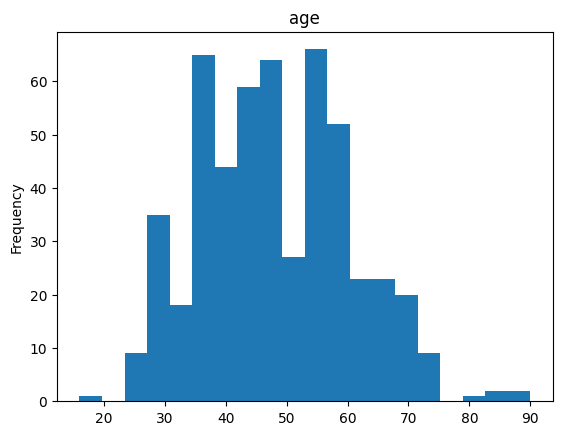

In [11]:
data['age'].plot(kind='hist', bins=20, title='age')

The above plot shows us the age distribution in the data

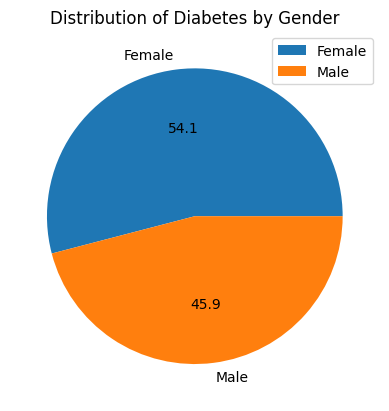

In [22]:
gender_diabetes_counts = data[data['class'] == 1]['gender'].value_counts()
plt.pie(gender_diabetes_counts, labels=["Female","Male"], autopct='%1.1f')
plt.title('Distribution of Diabetes by Gender')
plt.legend()
plt.show()

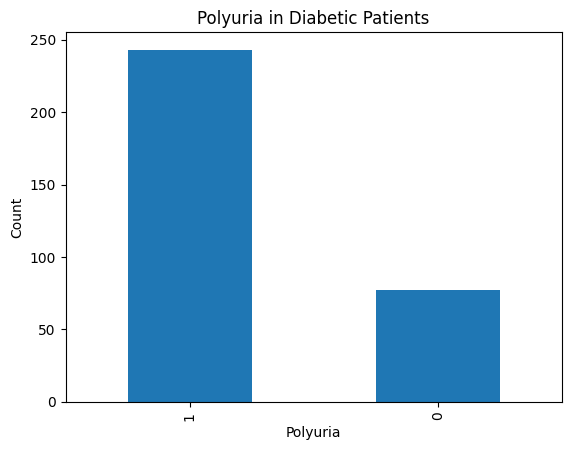

In [48]:
polyuria_diabetes = data[data['class'] == 1]['polyuria'].value_counts()
polyuria_diabetes.plot(kind='bar', title='Polyuria in Diabetic Patients')
plt.xlabel('Polyuria')
plt.ylabel('Count')
plt.show()

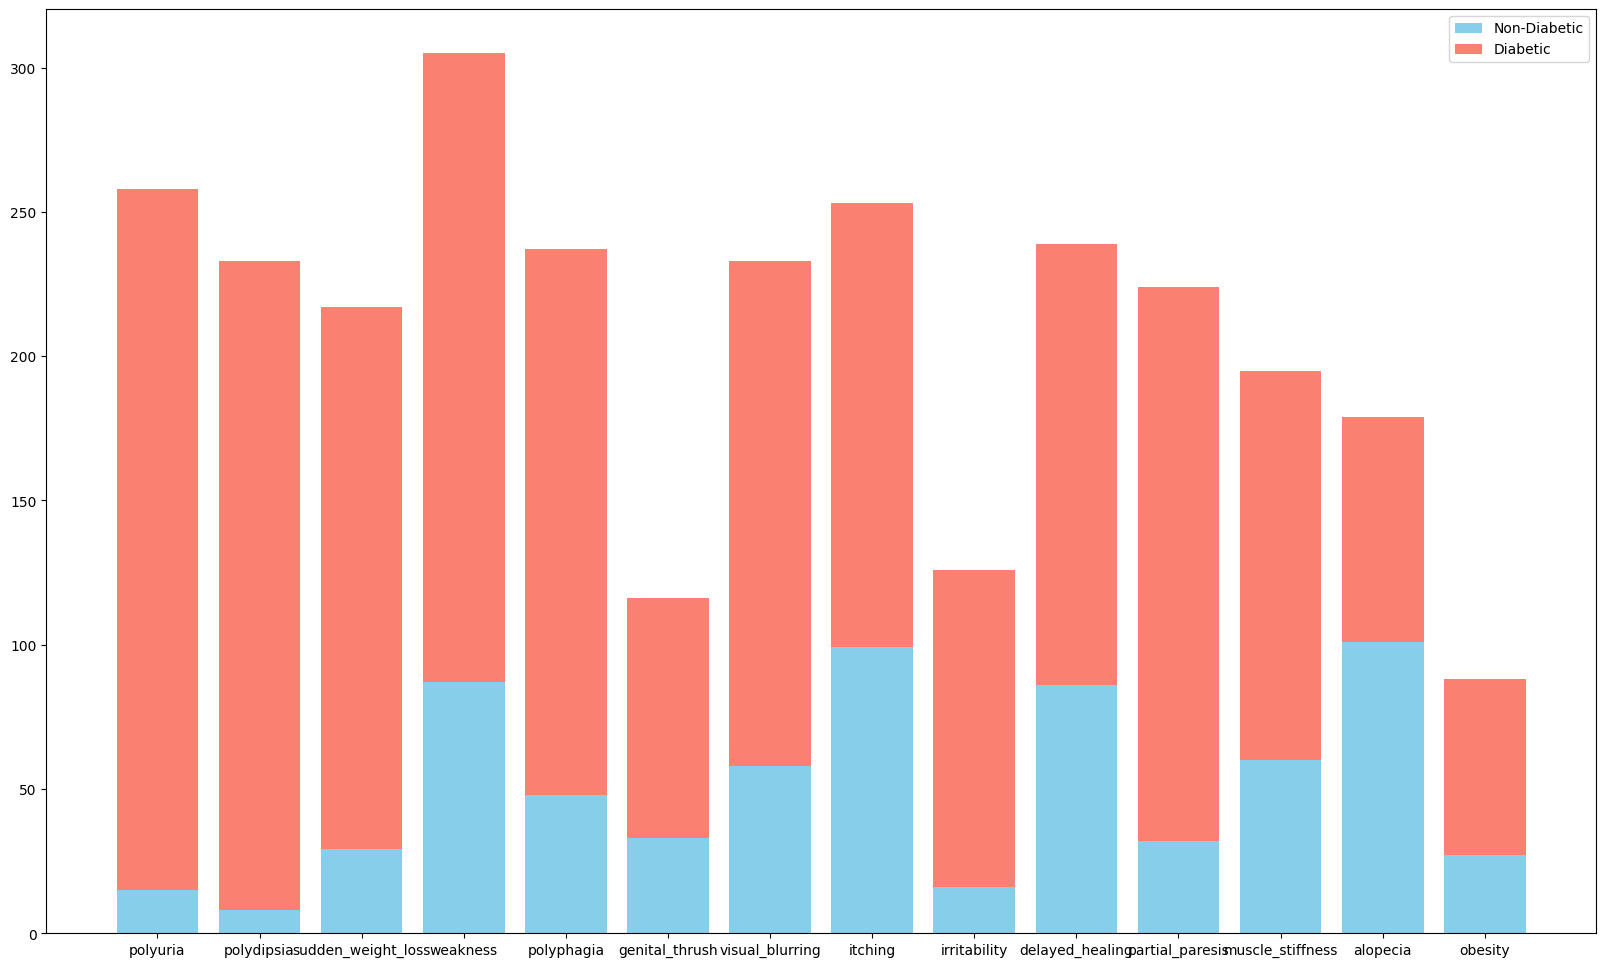

In [50]:
df=data
symptoms = df.columns[2:-1]
count_0=df[df['class'] == 0][symptoms].sum()
count_1=df[df['class'] == 1][symptoms].sum()
plt.figure(figsize=(20, 12))
plt.bar(symptoms, count_0, label='Non-Diabetic', color='skyblue')
plt.bar(symptoms, count_1, bottom=count_0, label='Diabetic', color='salmon')
plt.legend()

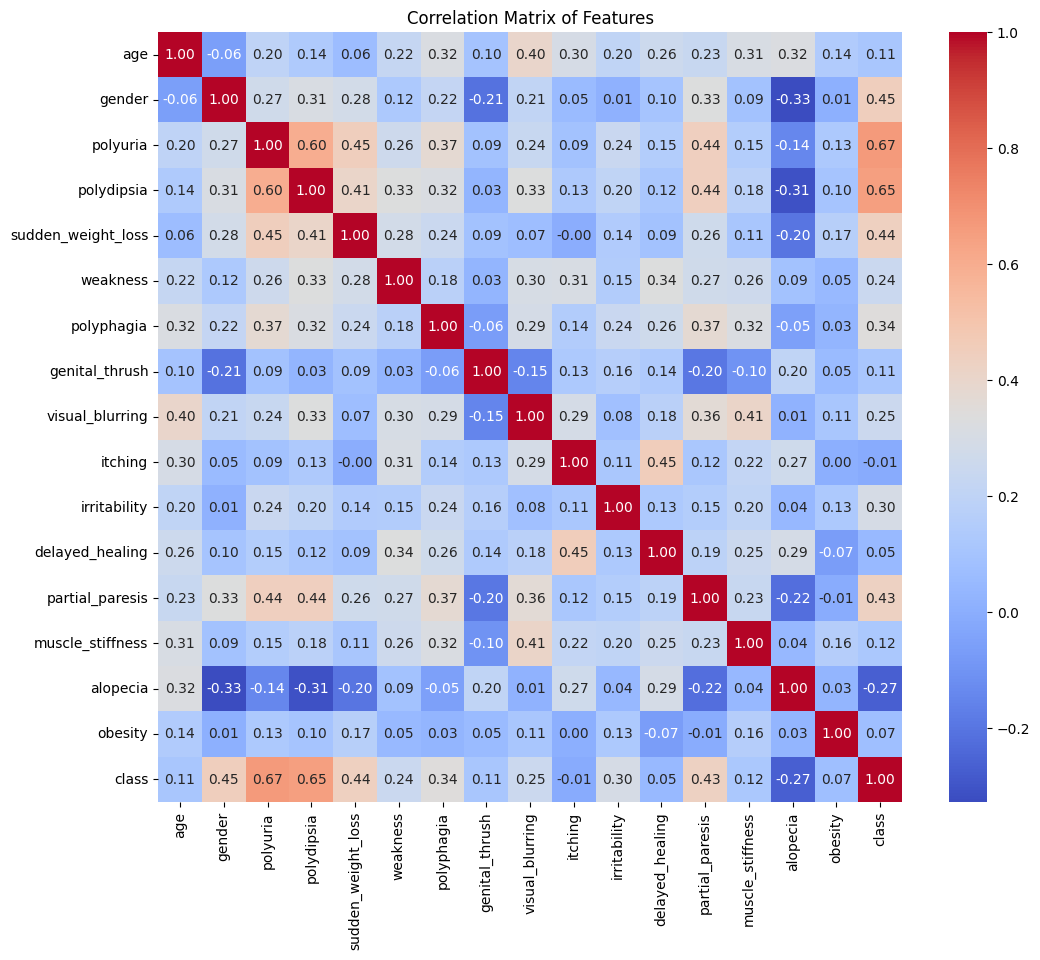

In [90]:
data=pd.read_csv('diabetes_data.csv',delimiter=';')
import seaborn as sns
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [81]:
data = data[data['class'] == 1 ]

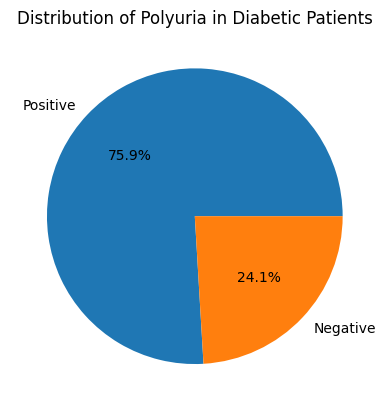

In [82]:
polyuria_diabetes = data[data['class'] == 1]['polyuria'].value_counts()
plt.pie(polyuria_diabetes, labels=["Positive","Negative"], autopct='%1.1f%%')
plt.title('Distribution of Polyuria in Diabetic Patients')
# plt.legend()
plt.show()

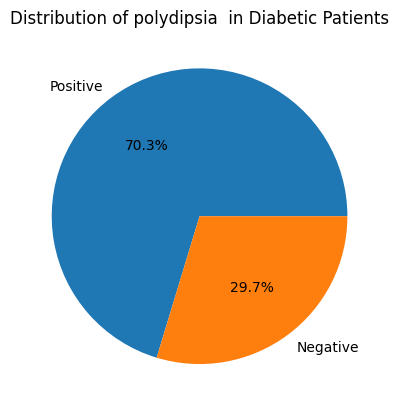

In [83]:
poly = data[data['class'] == 1]['polydipsia'].value_counts()
plt.pie(poly, labels=["Positive","Negative"], autopct='%1.1f%%')
plt.title('Distribution of polydipsia  in Diabetic Patients')
# plt.legend()
plt.show()